<a href="https://colab.research.google.com/github/Park-New-project/TIL/blob/main/%5BAI%5D_221028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 분류 문제 해결하기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab/data/iris.csv", names=['sepal_len','sepal_width',
                                                                        'petal_length', 'petal_width', 'species'])

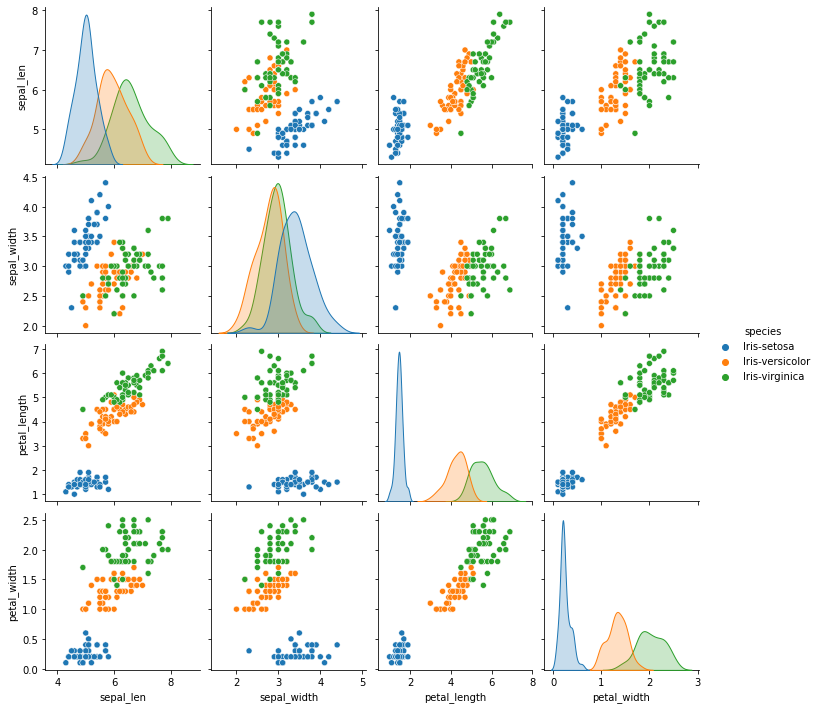

In [ ]:
# data set에서 쌍대관계를 플로팅
sns.pairplot(df, hue="species")
plt.show()

# 원 핫 인코딩
- 다 10인데 하나만 뜨겁다.
- 다중분류에서 정답은 반드시 원 핫 인코딩 이어야한다.
- 다중분류에서 문자열에서 숫자로 바꿀때는 레이블 핫 인코딩
- ex) 
- 0(setosa) -> [1,0,0]
- 1(versicolor) -> [0,1,0]
- 2(verginica) -> [0,0,1]

In [ ]:
# 데이터 전처리 

df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [ ]:
type(df.values)

numpy.ndarray

In [ ]:
dataset = df.values
dataset.shape

(150, 5)

In [ ]:
x=dataset[:,0:4]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
x=dataset[:,0:4].astype(float)
x.dtype

dtype('float64')

In [ ]:
y_obj=dataset[:,4]
y_obj.dtype

dtype('O')

In [ ]:
x.shape

(150, 4)

In [ ]:
y_obj.shape

(150,)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# string -> int로 인코딩
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [ ]:
import tensorflow as tf
from keras.utils import np_utils

y_encoded = tf.keras.utils.to_categorical(y)

y_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# 소프트맥스 softmax
- 활성화 함수
- 다중 분류에서 활용
- 노드수와 항목수가 일치해야 한다.
- ex)
- input (은닉층에서 나온 값) -> ws(가중합) ->
- 3.0 1.5 0.3 -> 소프트맥스 ->
- 0.7 0.2 0.1 -> 반올림(교차엔트로피) ->
- 1 0 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 깊이가 깊을수록 결과가 좋아지는 것은 아님

model = Sequential()

model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x,y_encoded, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 0s 789us/step - loss: 1.3285 - accuracy: 0.3333
Epoch 2/50
30/30 [==============================] - 0s 730us/step - loss: 1.1517 - accuracy: 0.3333
Epoch 3/50
30/30 [==============================] - 0s 789us/step - loss: 1.1054 - accuracy: 0.3333
Epoch 4/50
30/30 [==============================] - 0s 757us/step - loss: 1.0727 - accuracy: 0.3333
Epoch 5/50
30/30 [==============================] - 0s 768us/step - loss: 1.0324 - accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 0s 778us/step - loss: 0.9974 - accuracy: 0.3333
Epoch 7/50
30/30 [==============================] - 0s 812us/step - loss: 0.9590 - accuracy: 0.4333
Epoch 8/50
30/30 [==============================] - 0s 833us/step - loss: 0.9246 - accuracy: 0.6600
Epoch 9/50
30/30 [==============================] - 0s 848us/step - loss: 0.8895 - accuracy: 0.6600
Epoch 10/50
30/30 [==============================] - 0s 1ms/step - loss: 0.8526 - accuracy: 0.6667
E

In [ ]:
model.evaluate(x,y_encoded)[1]*100

5/5 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.9800


98.00000190734863

# 과적합
- 학습을 많이 시키면 train_data의 성능은 좋으나 다른 data로 처리 시 성능 하락

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab/data/sonar.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
dataset = df.values
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [ ]:
x = dataset[:,0:60].astype(float)
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [ ]:
y_obj = dataset[:,60]
y_obj

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [ ]:
# 레이블 인코딩 (str -> int)
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(y_obj)

y = e.transform(y_obj)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(x,y,epochs=130, batch_size=5)

Epoch 1/130
42/42 [==============================] - 0s 888us/step - loss: 0.7004 - accuracy: 0.4952
Epoch 2/130
42/42 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5481
Epoch 3/130
42/42 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6442
Epoch 4/130
42/42 [==============================] - 0s 848us/step - loss: 0.6416 - accuracy: 0.6635
Epoch 5/130
42/42 [==============================] - 0s 873us/step - loss: 0.6177 - accuracy: 0.7212
Epoch 6/130
42/42 [==============================] - 0s 906us/step - loss: 0.5988 - accuracy: 0.7404
Epoch 7/130
42/42 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7356
Epoch 8/130
42/42 [==============================] - 0s 848us/step - loss: 0.5486 - accuracy: 0.7740
Epoch 9/130
42/42 [==============================] - 0s 847us/step - loss: 0.5291 - accuracy: 0.7740
Epoch 10/130
42/42 [==============================] - 0s 986us/step - loss: 0.5036 - accuracy: 0.

In [ ]:
model.evaluate(x,y)[1]*100

7/7 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 1.0000


100.0

In [ ]:
del model

NameError: ignored

# 과적합 요인 
- 은닉층의 수 (은닉층의 깊이가 깊을수록)
- epochs : 반복 학습량이 많을수록

# 과적합 방지
- 학습 셋과 테스트 셋을 명확히 구분
- 학습과 동시에 테스트 병행



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, shuffle=True) 

In [ ]:
print(x_train.shape)
print(x_test.shape)

(145, 60)
(63, 60)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(145,)
(63,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(24, input_dim = 60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100, batch_size=5)

Epoch 1/100
29/29 [==============================] - 0s 940us/step - loss: 0.6923 - accuracy: 0.5103
Epoch 2/100
29/29 [==============================] - 0s 940us/step - loss: 0.6667 - accuracy: 0.6414
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6483
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6828
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.7172
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7379
Epoch 7/100
29/29 [==============================] - 0s 921us/step - loss: 0.5866 - accuracy: 0.7586
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7793
Epoch 9/100
29/29 [==============================] - 0s 904us/step - loss: 0.5537 - accuracy: 0.7448
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.8069
E

In [ ]:
print("train 정확도 : %.2f"%(model.evaluate(x_train,y_train)[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9724
train 정확도 : 97.24


In [ ]:
print("정확도 : %.2f"%(model.evaluate(x_test,y_test)[1]*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8571
정확도 : 85.71


In [ ]:
# 모델 저장 및 재사용
model.save("/content/gdrive/MyDrive/Colab/data//model/model_1.hdf5")

In [ ]:
del model # 메모리에 있는 모델 삭제

In [ ]:
print("test 정확도 : %.2f"%(model.evaluate(x_test,y_test)[1]*100))

NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model

model2=load_model("/content/gdrive/MyDrive/Colab/data//model/model_1.hdf5")
print("정확도 : %.2f"%(model2.evaluate(x_test,y_test)[1]*100))

2/2 [==============================] - 0s 8ms/step - loss: 0.4221 - accuracy: 0.8571
정확도 : 85.71


# k겹 교차 검증
- 샘플 수가 적을 때 사용
